<a href="https://colab.research.google.com/github/botshelf/stable-diffusion-generates-harry-potter/blob/main/StableDiffusionGeneratesHarryPotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to generate images of Harry Potter characters with stable diffusion model.

`#text-to-image` models have become trending topic in the last months thanks to the hype generated by DALL-E2 (OpenAI), ImaGen (Google) and now Stable Diffusion (Stability.ai).

Stable Diffusion is a latent diffusion model, introduced by `#stable.ai`, able to generate photo-realistic images, coherent with the provided description. 

Diffusion models set the state-of-the-art for generating image. But one of their downside is that the reverse denoising process is slow and the models consume a lot of memory to operate in pixel space. 

Latent diffusion model, instead, reduce the memory and compute complexity by operating in a lower dimensional (latent) space.
This means that Stable Diffusion can be run in a few seconds, without requiring as much hardware, and last but not least it has a smaller `#carbonfootprint`.


## Setup

Install dependencies needed to run Stable Diffusion model.

In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 5.3 MB/s 
     |████████████████████████████████| 120 kB 45.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 6.6 MB 38.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


Import packages and perform huggingface login. 

Note: We’ll have to agree to some terms to access Stable Diffusion. By this we’re agreeing to share  with the authors of Stable Diffusion our email and Hugging Face username. To accept the terms we have to go to https://huggingface.co/CompVis/stable-diffusion-v-1-4-original, scroll down a little, click the checkmark to accept the terms and click Access repository.

In [ ]:
import torch

from diffusers import StableDiffusionPipeline
from google.colab import output
from huggingface_hub import notebook_login
from PIL import Image
from torch import autocast

output.enable_custom_widget_manager()
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


Download pretrained model weights and all components.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


Define a function `generate_image` to perform image generation starting from a textual description. To make results reproducible we set 31071980 (Harry's birthday) as seed.

In [ ]:
def generate_image(caption, seed=31071980, num_inference_steps=80):
  generator = torch.Generator("cuda").manual_seed(seed)
  with autocast("cuda"): #Using autocast will run inference faster because it uses half-precision.
    image = pipe(caption, num_inference_steps=num_inference_steps, generator=generator).images[0]
  return image

## Harry Potter


  0%|          | 0/85 [00:00<?, ?it/s]

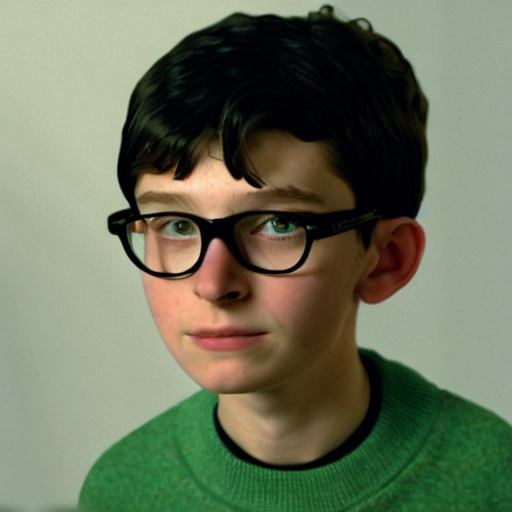

In [ ]:
caption = 'An eleven year old boy with a thin face, knobbly knees, black hair, bright green eyes. He wears round glasses held together with a lot of scotch. He has a very thin lightning-shaped scar on his forehead'
generate_image(caption)

## Hermione Granger


  0%|          | 0/85 [00:00<?, ?it/s]

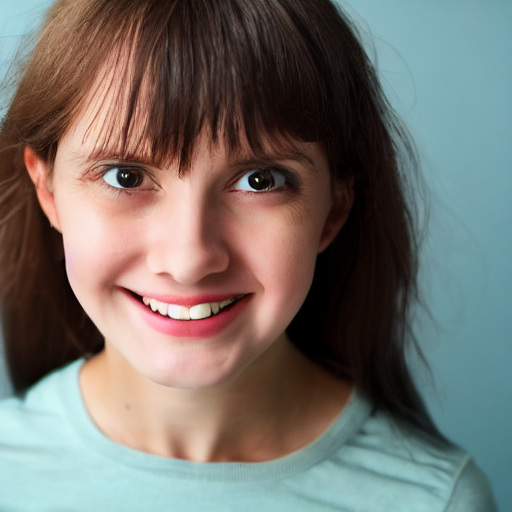

In [ ]:
caption = 'A twelve year old girl with a bossy sort of voice, lots of bushy brown hair and rather large front teeth'
generate_image(caption)

## Ron Weasley


  0%|          | 0/85 [00:00<?, ?it/s]

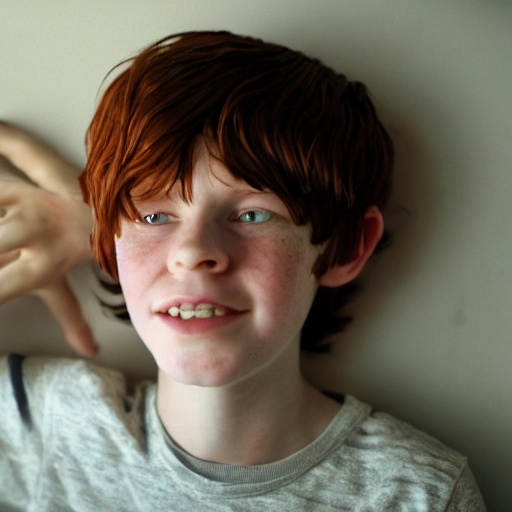

In [ ]:
caption = 'An eleven year old boy that is tall, thin, gangling, freckles, big hands and feet, and a long nose. He has short red hair'
generate_image(caption)

## Severus Snape

  0%|          | 0/85 [00:00<?, ?it/s]

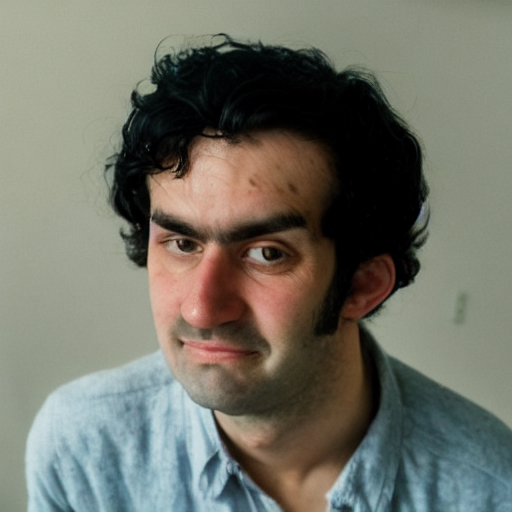

In [ ]:
caption = 'A thirty one year old professor man, with greasy black hair, a hooked nose and sallow skin.'
generate_image(caption)

  0%|          | 0/85 [00:00<?, ?it/s]

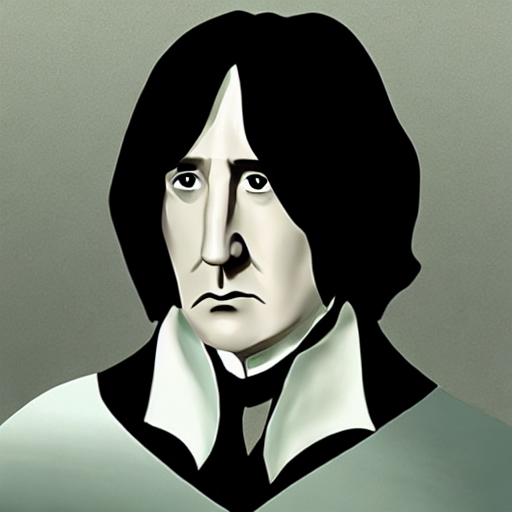

In [ ]:
caption ='Professor Severus Snape'
generate_image(caption)

## Try it yourself

In [ ]:
#@markdown Add your textual description and then push the play button to see the corrsponding image.

description = '' #@param {type:"string"}
generate_image(description)